#### PHY480 Final Project
### &#9989; Patrick Johns
#### &#9989; 4/18/2019

   # Tackling the Double Pendulum

## Background and Motivation

Chaos Theory is a subsection of mathematics that deals with dynamical systems that exhibit large differences in trajectories from changing the initial conditions of the system. A system that fits this description is the double pendulum. In order to show these large differences, mulitple plots will be plotted against one another of different initial conditions. A long with showing chaos, Attempts at finding order in the chaos will also be tried.

** How to run **
Simply click and run each cell in order to execute each code snippet.

## Methodology


First, we will solve this system based on the angle each mass bob makes with the vertical, along with the angular velocities 
of both of these angles.

<img src="http://web.mit.edu/jorloff/www/chaosTalk/double-pendulum/dbl_pendulum.gif">

The details of solving this system are slightly messy, but can be done using Lagragians and computer algebraic differential equation solvers. After defining the system based on the lagrangian which is defined to be the kinetic energy of the system minus the potential energy, Euler Lagrange equations give:




<img src="http://educ.jmu.edu/~sochacjs/VideoWall/double-pendulum/derivatives.gif">

which reduce to:

θ1' = ω1

θ2' = ω2

ω1' =  	−g (2 m1 + m2) sin θ1 − m2 g sin(θ1 − 2 θ2) − 2 sin(θ1 − θ2) m2 (ω22 L2 + ω12 L1 cos(θ1 − θ2))/
L1 (2 m1 + m2 − m2 cos(2 θ1 − 2 θ2))

ω2' =  	2 sin(θ1−θ2) (ω12 L1 (m1 + m2) + g(m1 + m2) cos θ1 + ω22 L2 m2 cos(θ1 − θ2))/
L2 (2 m1 + m2 − m2 cos(2 θ1 − 2 θ2))

Which are then numerically solved using odeint as shown below:

Text(0.5, 1.0, 'Angles 1 and 2 vs. Time')

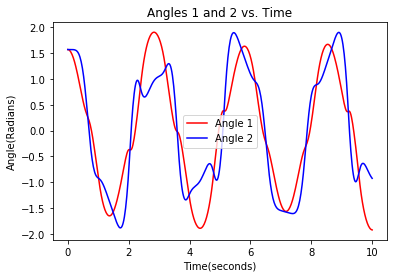

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
#Parameters
L1=1 #length of pendulum 1 in meters
L2=1 #Similarly for pendulum 2
m1=1 #Mass of pendulum 1
m2=1 #Similarly for pendulum 2
ti=0
tf=10
dt=.02
g=9.81 #Acceleration of Gravity
t = np.arange(ti,tf+dt,dt)  #Array of times.

#Derivative Function.
def f(theta, t):
        W1 = theta[0]    #Angle
        W1v = theta[1]    #time derivative of the angle
        W2 = theta[2]    #Similarly for the second mass.
        W2v = theta[3]    
        #Equations of motion
        f0 = W1v
        f1 = (-g*(2*m1 + m2)*np.sin(W1) - m2*g*np.sin(W1 - 2*W2) - 2*np.sin(W1 - W2)*m2*((W2v**2)*L2 + (W1v**2)*L1 
        *np.cos(W1 - W2)))/(L1*(2*m1 + m2 - m2*np.cos(2*W1 - 2*W2)))
        f2 = W2v
        f3 = (2*np.sin(W1-W2)*((W1v**2)*L1*(m1 + m2) + g*(m1 + m2)*np.cos(W1) + (W2v**2)*L2*m2*np.cos(W1-W2)))/(L2*(2*m1 +
        m2 - m2*np.cos(2*W1 - 2*W1)))
        return [f0, f1, f2, f3]

Initial=[np.pi/2,0,np.pi/2,0] #Initial Values

soln = odeint(f, Initial, t) #solving for angle and angular velocity over time.
W1 = soln[:, 0]
W1v = soln[:, 1]
W2 = soln[:, 2]
W2v = soln[:, 3]

plt.plot(t,W1,'r',label="Angle 1")
plt.plot(t,W2,'b',label="Angle 2")
plt.legend()
plt.xlabel('Time(seconds)')
plt.ylabel('Angle(Radians)')
plt.title('Angles 1 and 2 vs. Time')

    

# Getting The Trajectories

For this, we can do a simple analysis for what x and y would be, along with their time derivatives, based on the length of the two pendulums and the angle they make with the vertical.

In [2]:
#Finding x and y trajectories
x1=L1*np.sin(W1)     #x position of bob 1
y1=-L1*np.cos(W1)    #y position of bob 1
x2=x1 + L2*np.sin(W2)  #Similarly for bob 2
y2=y1 - L2*np.cos(W2)
x1v=W1v*x1         #x time derivative for bob 1
y1v=W1v*y1         #y time derivative for bob 1
x2v=x1v + W2v*L2*np.sin(W2)   #Similarly for bob 2
y2v=y1v + W2v*L2*np.cos(W2)

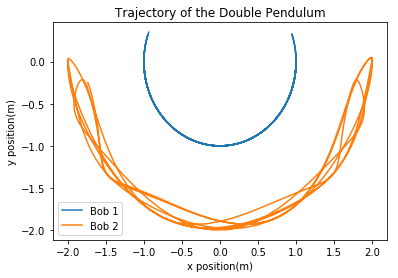

In [3]:
plt.plot(x1,y1,label='Bob 1')
plt.plot(x2,y2,label='Bob 2')
plt.xlabel('x position(m)')
plt.ylabel('y position(m)')
plt.title('Trajectory of the Double Pendulum')
plt.legend()



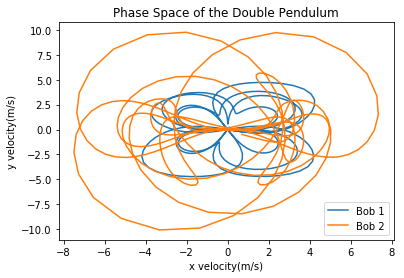

In [4]:
plt.plot(x1v,y1v,label='Bob 1')
plt.plot(x2v,y2v,label='Bob 2')
plt.xlabel('x velocity(m/s)')
plt.ylabel('y velocity(m/s)')
plt.title('Phase Space of the Double Pendulum')
plt.legend()

This same system animated is below:

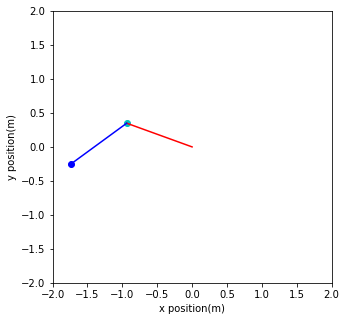

IndexError: index 600 is out of bounds for axis 0 with size 501

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [5]:
from IPython.display import display, clear_output
import time


for i in range(len(x1)):
    
    fig = plt.figure(figsize=(5,5))
    plt.plot(x1[100*i], y1[100*i],'co')
    plt.plot(x2[100*i], y2[100*i],'bo')
    plt.plot([0,x1[100*i]],[0,y1[100*i]] ,'r')
    plt.plot([x1[100*i], x2[100*i]], [y1[100*i], y2[100*i]],'b')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.xlabel('x position(m)')
    plt.ylabel('y position(m)')
    time.sleep(0.01)  
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()             # clear output for animation


# Testing the Chaotic Waters

Now to plot various initial conditions on top of one another in order to see the chaos in action. Only Bob 2 is plotted because the constrained motion of the first bob is uninteresting. Here, green dots mark the start of the motion and red dots mark the end of the motion for the alloted time.

In [ ]:
def f(theta, t):
        W1 = theta[0]    #Angle
        W1v = theta[1]    #time derivative of the angle
        W2 = theta[2]    #Similarly for the second mass.
        W2v = theta[3]    
        #Equations of motion
        f0 = W1v
        f1 = (-g*(2*m1 + m2)*np.sin(W1) - m2*g*np.sin(W1 - 2*W2) - 2*np.sin(W1 - W2)*m2*((W2v**2)*L2 + (W1v**2)*L1 
        *np.cos(W1 - W2)))/(L1*(2*m1 + m2 - m2*np.cos(2*W1 - 2*W2)))
        f2 = W2v
        f3 = (2*np.sin(W1-W2)*((W1v**2)*L1*(m1 + m2) + g*(m1 + m2)*np.cos(W1) + (W2v**2)*L2*m2*np.cos(W1-W2)))/(L2*(2*m1 +
        m2 - m2*np.cos(2*W1 - 2*W1)))
        return [f0, f1, f2, f3]
t = np.arange(ti,tf+dt,dt)





plt.figure(figsize=(20,10))
for i in range(4):
    Initial=[np.pi/2,0,np.pi+i/1000,0] #Initial Values

    soln = odeint(f, Initial, t) #solving for angle and angular velocity over time.
    W1 = soln[:, 0]
    W1v = soln[:, 1]
    W2 = soln[:, 2]
    W2v = soln[:, 3]
    
    x1=L1*np.sin(W1)     #x position of bob 1
    y1=-L1*np.cos(W1)    #y position of bob 1
    x2=x1 + L2*np.sin(W2)  #Similarly for bob 2
    y2=y1 - L2*np.cos(W2)
    
    plt.plot(x2,y2,label=('Bob 2 trajectory',i+1))
    plt.plot(x2[-1],y2[-1],'ro')
    plt.plot(x2[0],y2[0],'go')
    plt.xlabel('x position(m)')
    plt.ylabel('y position(m)')
    plt.title('Trajectories of the Double Pendulum')
    plt.legend()
    
    


The plots above were made by differring the angle that the second bob makes with the vertical by 1/1000 radians. All other initial conditions were set to 0 besides the angle that the first bob makes with the vertical, which was kept at a constant pi/2. So far, The system looks to be fairly similar within the first 5 seconds, let's look at the next 5 seconds.

In [ ]:
def f(theta, t):
        W1 = theta[0]    #Angle
        W1v = theta[1]    #time derivative of the angle
        W2 = theta[2]    #Similarly for the second mass.
        W2v = theta[3]    
        #Equations of motion
        f0 = W1v
        f1 = (-g*(2*m1 + m2)*np.sin(W1) - m2*g*np.sin(W1 - 2*W2) - 2*np.sin(W1 - W2)*m2*((W2v**2)*L2 + (W1v**2)*L1 
        *np.cos(W1 - W2)))/(L1*(2*m1 + m2 - m2*np.cos(2*W1 - 2*W2)))
        f2 = W2v
        f3 = (2*np.sin(W1-W2)*((W1v**2)*L1*(m1 + m2) + g*(m1 + m2)*np.cos(W1) + (W2v**2)*L2*m2*np.cos(W1-W2)))/(L2*(2*m1 +
        m2 - m2*np.cos(2*W1 - 2*W1)))
        return [f0, f1, f2, f3]
t = np.arange(ti,tf+dt,dt)





plt.figure(figsize=(20,10))
for i in range(4):
    Initial=[np.pi/2,0,np.pi+i/1000,0] #Initial Values

    soln = odeint(f, Initial, t) #solving for angle and angular velocity over time.
    W1 = soln[5000:10001, 0]
    W1v = soln[5000:10001, 1]
    W2 = soln[5000:10001, 2]
    W2v = soln[5000:10001, 3]
    
    x1=L1*np.sin(W1)     #x position of bob 1
    y1=-L1*np.cos(W1)    #y position of bob 1
    x2=x1 + L2*np.sin(W2)  #Similarly for bob 2
    y2=y1 - L2*np.cos(W2)
    
    plt.plot(x2,y2,label=('Bob 2 trajectory',i+1))
    plt.plot(x2[-1],y2[-1],'ro')
    plt.plot(x2[0],y2[0],'go')
    plt.xlabel('x position(m)')
    plt.ylabel('y position(m)')
    plt.title('Trajectories of the Double Pendulum')
    plt.legend()

From here, one can clearly see that the trajectories have lost almost all similarities after a crucial point in the trajectory, pin pointing that point:


In [ ]:
def f(theta, t):
        W1 = theta[0]    #Angle
        W1v = theta[1]    #time derivative of the angle
        W2 = theta[2]    #Similarly for the second mass.
        W2v = theta[3]    
        #Equations of motion
        f0 = W1v
        f1 = (-g*(2*m1 + m2)*np.sin(W1) - m2*g*np.sin(W1 - 2*W2) - 2*np.sin(W1 - W2)*m2*((W2v**2)*L2 + (W1v**2)*L1 
        *np.cos(W1 - W2)))/(L1*(2*m1 + m2 - m2*np.cos(2*W1 - 2*W2)))
        f2 = W2v
        f3 = (2*np.sin(W1-W2)*((W1v**2)*L1*(m1 + m2) + g*(m1 + m2)*np.cos(W1) + (W2v**2)*L2*m2*np.cos(W1-W2)))/(L2*(2*m1 +
        m2 - m2*np.cos(2*W1 - 2*W1)))
        return [f0, f1, f2, f3]
t = np.arange(ti,2*tf+dt,dt)





plt.figure(figsize=(20,10))
for i in range(4):
    Initial=[np.pi/2,0,np.pi+i/1000,0] #Initial Values

    soln = odeint(f, Initial, t) #solving for angle and angular velocity over time.
    W1 = soln[6900:10001, 0]
    W1v = soln[6900:10001, 1]
    W2 = soln[6900:10001, 2]
    W2v = soln[6900:10001, 3]
    
    x1=L1*np.sin(W1)     #x position of bob 1
    y1=-L1*np.cos(W1)    #y position of bob 1
    x2=x1 + L2*np.sin(W2)  #Similarly for bob 2
    y2=y1 - L2*np.cos(W2)
    
    plt.plot(x2,y2,label=('Bob 2 trajectory',i+1))
    plt.plot(x2[-1],y2[-1],'ro')
    plt.plot(x2[0],y2[0],'go')
    plt.xlabel('x position(m)')
    plt.ylabel('y position(m)')
    plt.title('Trajectories of the Double Pendulum')
    plt.legend()

Through trial and error, this point seems to be at 6.9 seconds into the trajectories. From here each trajectory features a loop signalling the second bob going up and around the first bob. To illustrate this vast turning point, animations of trajectories 4 and 1 are shown here side by side.

In [ ]:
def f(theta, t):
        W1 = theta[0]    #Angle
        W1v = theta[1]    #time derivative of the angle
        W2 = theta[2]    #Similarly for the second mass.
        W2v = theta[3]    
        #Equations of motion
        f0 = W1v
        f1 = (-g*(2*m1 + m2)*np.sin(W1) - m2*g*np.sin(W1 - 2*W2) - 2*np.sin(W1 - W2)*m2*((W2v**2)*L2 + (W1v**2)*L1 
        *np.cos(W1 - W2)))/(L1*(2*m1 + m2 - m2*np.cos(2*W1 - 2*W2)))
        f2 = W2v
        f3 = (2*np.sin(W1-W2)*((W1v**2)*L1*(m1 + m2) + g*(m1 + m2)*np.cos(W1) + (W2v**2)*L2*m2*np.cos(W1-W2)))/(L2*(2*m1 +
        m2 - m2*np.cos(2*W1 - 2*W1)))
        return [f0, f1, f2, f3]

Initial=[np.pi/2,0,np.pi,0] #Initial Values

soln1 = odeint(f, Initial, t) #solving for angle and angular velocity over time.
W11 = soln1[:, 0]
W11v = soln1[:, 1]
W21 = soln1[:, 2]
W21v = soln1[:, 3]

x11=L1*np.sin(W11)     #x position of bob 1
y11=-L1*np.cos(W11)    #y position of bob 1
x21=x11 + L2*np.sin(W21)  #Similarly for bob 2
y21=y11 - L2*np.cos(W21)

Initial=[np.pi/2,0,np.pi+3/1000,0] #Initial Values

soln2 = odeint(f, Initial, t) #solving for angle and angular velocity over time.
W12 = soln2[:, 0]
W12v = soln2[:, 1]
W22 = soln2[:, 2]
W22v = soln2[:, 3]

x12=L1*np.sin(W12)     #x position of bob 1
y12=-L1*np.cos(W12)    #y position of bob 1
x22=x12 + L2*np.sin(W22)  #Similarly for bob 2
y22=y12 - L2*np.cos(W22)
picname=['p','i','c','1','.','p','n','g']
for i in range(len(x1)):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.plot(x11[i], y11[i],'co')
    plt.plot(x21[i], y21[i],'bo')
    plt.plot([0,x11[i]],[0,y11[i]] ,'r')
    plt.plot([x11[i], x21[i]], [y11[i], y21[i]],'b')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.xlabel('x position(m)')
    plt.ylabel('y position(m)')
    plt.title('Trajectory 1')
    plt.subplot(122)
    plt.plot(x12[i], y12[i],'co')
    plt.plot(x22[i], y22[i],'bo')
    plt.plot([0,x12[i]],[0,y12[i]] ,'r')
    plt.plot([x12[i], x22[i]], [y12[i], y22[i]],'b')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.xlabel('x position(m)')
    plt.ylabel('y position(m)')
    plt.title('Trajectory 4')
    plt.savefig("".join(picname))
    picname[3]=str(i+2)
    #time.sleep(0.01)  
    #clear_output(wait = True)
    #display(fig)            # Reset display
    #fig.clear()             # clear output for animation


In [ ]:
for i in range(3):
    picname=['p','i','c','1','.','p','n','g']
    picname[3]=str(i+2)

# Results

Through plotting the 4 different trajectories above, I have successfully illustrated what chaos is and how very minute differences result in completely different results. The whole basis of what chaos is is when a system is deterministic, meaning you can completely trace out the trajectories much like we did here, but if you change the initial conditions by just a very slight value the entire outcome is different. This implies that, if I were to try to build a double pendulum and mimick the trajectory above, my chances at success would be very slim, if not impossible. In addition to not only just showing chaos, I believe that I might have pinpointed a "point of divergence" leading from one pattern of trajectories to the next. This can be seen here:

In [ ]:
def f(theta, t):
        W1 = theta[0]    #Angle
        W1v = theta[1]    #time derivative of the angle
        W2 = theta[2]    #Similarly for the second mass.
        W2v = theta[3]    
        #Equations of motion
        f0 = W1v
        f1 = (-g*(2*m1 + m2)*np.sin(W1) - m2*g*np.sin(W1 - 2*W2) - 2*np.sin(W1 - W2)*m2*((W2v**2)*L2 + (W1v**2)*L1 
        *np.cos(W1 - W2)))/(L1*(2*m1 + m2 - m2*np.cos(2*W1 - 2*W2)))
        f2 = W2v
        f3 = (2*np.sin(W1-W2)*((W1v**2)*L1*(m1 + m2) + g*(m1 + m2)*np.cos(W1) + (W2v**2)*L2*m2*np.cos(W1-W2)))/(L2*(2*m1 +
        m2 - m2*np.cos(2*W1 - 2*W1)))
        return [f0, f1, f2, f3]
t = np.arange(ti,2*tf+dt,dt)





plt.figure(figsize=(20,10))
for i in range(4):
    Initial=[np.pi/2,0,np.pi+i/1000,0] #Initial Values

    soln = odeint(f, Initial, t) #solving for angle and angular velocity over time.
    W1 = soln[5000:10001, 0]
    W1v = soln[5000:10001, 1]
    W2 = soln[5000:10001, 2]
    W2v = soln[5000:10001, 3]
    
    x1=L1*np.sin(W1)     #x position of bob 1
    y1=-L1*np.cos(W1)    #y position of bob 1
    x2=x1 + L2*np.sin(W2)  #Similarly for bob 2
    y2=y1 - L2*np.cos(W2)
    
    plt.plot(x2,y2,label=('Bob 2 trajectory',i+1))
    plt.plot(x2[-1],y2[-1],'ro')
    plt.plot(x2[0],y2[0],'go')
    plt.xlabel('x position(m)')
    plt.ylabel('y position(m)')
    plt.title('Trajectories of the Double Pendulum')
    plt.legend()

All of these trajectories have very similar paths until a very crucial point(identified at 6.9 seconds) that can be considered a "point of divergence." This single point is when the sensitivity to the initial conditions is truly shown. Only starting from that point we then saw:

In [ ]:
plt.figure(figsize=(20,10))
for i in range(4):
    Initial=[np.pi/2,0,np.pi+i/1000,0] #Initial Values

    soln = odeint(f, Initial, t) #solving for angle and angular velocity over time.
    W1 = soln[6900:10001, 0]
    W1v = soln[6900:10001, 1]
    W2 = soln[6900:10001, 2]
    W2v = soln[6900:10001, 3]
    
    x1=L1*np.sin(W1)     #x position of bob 1
    y1=-L1*np.cos(W1)    #y position of bob 1
    x2=x1 + L2*np.sin(W2)  #Similarly for bob 2
    y2=y1 - L2*np.cos(W2)
    
    plt.plot(x2,y2,label=('Bob 2 trajectory',i+1))
    plt.plot(x2[-1],y2[-1],'ro')
    plt.plot(x2[0],y2[0],'go')
    plt.xlabel('x position(m)')
    plt.ylabel('y position(m)')
    plt.title('Trajectories of the Double Pendulum')
    plt.legend()

Now it is true that in each trajectory, a "loop" does occur. But the times that they occur and the locations are all completely different, so this can be considered as a "pattern" found in the chaos.

# Discussion and Conclusion.

Through carrying out these tests I have gained a grasp on how sensitive chaotic systems are to the initial conditions. The major obstacle that I ran into was an error with "pickling", which was causing odeint to stop working. I fixed this by restarting the kernel and redefining my derivative function every time I called odeint. The exact error message that was given was "TypeError: can't pickle module objects" which is caused when a class attribute references a module. This was likely the cause of odeint's methods using a class, but the exact details of why this error was being caused could not be determined. If were to study chaos again, I would conduct a more thorough search into a wide variety of initial conditions, a long with measuring the variation with respect to time for initial conditions compared with each other. 

The overall conclusion was that the double pendulum is indeed a very chaotic system, with changes as little as 5 milliradians completely changing the trajectories. Finding order in the chaos was not too successful, but similarities such as the trajectories almost mirroring each other up to a certain point and all looping after a certain point were shown. 

# References.

“Chaos Theory.” Wikipedia, Wikimedia Foundation, 9 Apr. 2019, en.wikipedia.org/wiki/Chaos_theory.

“Double Pendulum.” MyPhysicsLab Double Pendulum, 2002, web.mit.edu/jorloff/www/chaosTalk/double-pendulum/double-pendulum-en.html.

High-Resolution Visualization and Animation - Double Pendulum, educ.jmu.edu/~sochacjs/VideoWall/double-pendulum/index.html.
